In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### 시계열 모델에 따라 추정 결과가 굉장히 달라질 수 있음
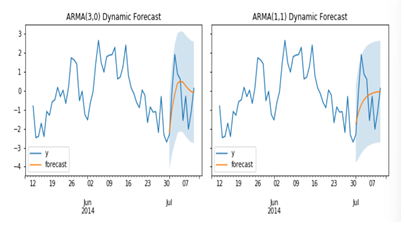

In [2]:
earthquake=pd.read_csv("earthquakes.csv", index_col='date', parse_dates=True)
earthquake=earthquake.drop(['Year'], axis=1)
earthquake=earthquake.rename(columns={'earthquakes_per_year' : 'earthquake'})

In [4]:
earthquake

,earthquake
date,
1900-01-01,13.0
1901-01-01,14.0
1902-01-01,8.0
1903-01-01,10.0
1904-01-01,16.0
...,...
1994-01-01,15.0
1995-01-01,25.0
1996-01-01,22.0


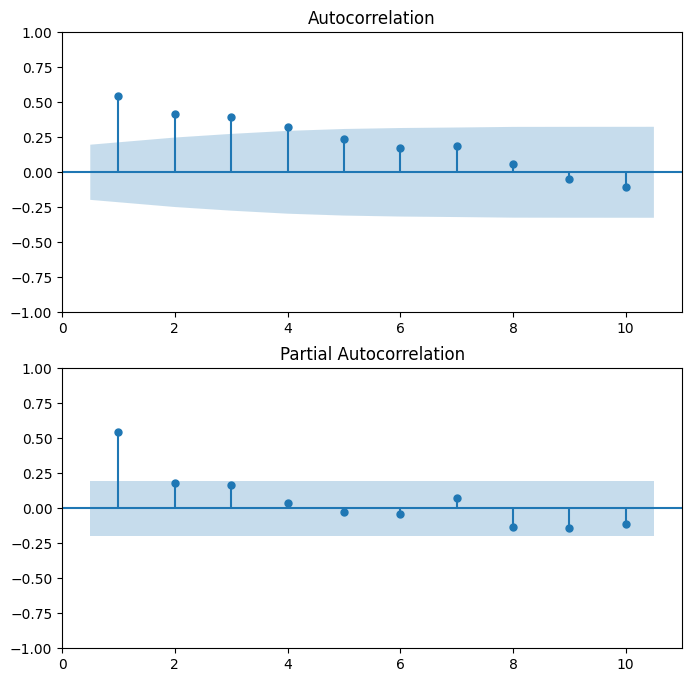

In [5]:
fig, (ax1, ax2)=plt.subplots(2,1,figsize=(8,8))
plot_acf(earthquake,lags=10, zero=False,ax=ax1)
plot_pacf(earthquake,lags=10, zero=False, ax=ax2)
plt.show()
### AR 3 모형이다

ACF 값이 작고 파란색 음영 영역 안에 있으면 통계적으로 유의하지 않음
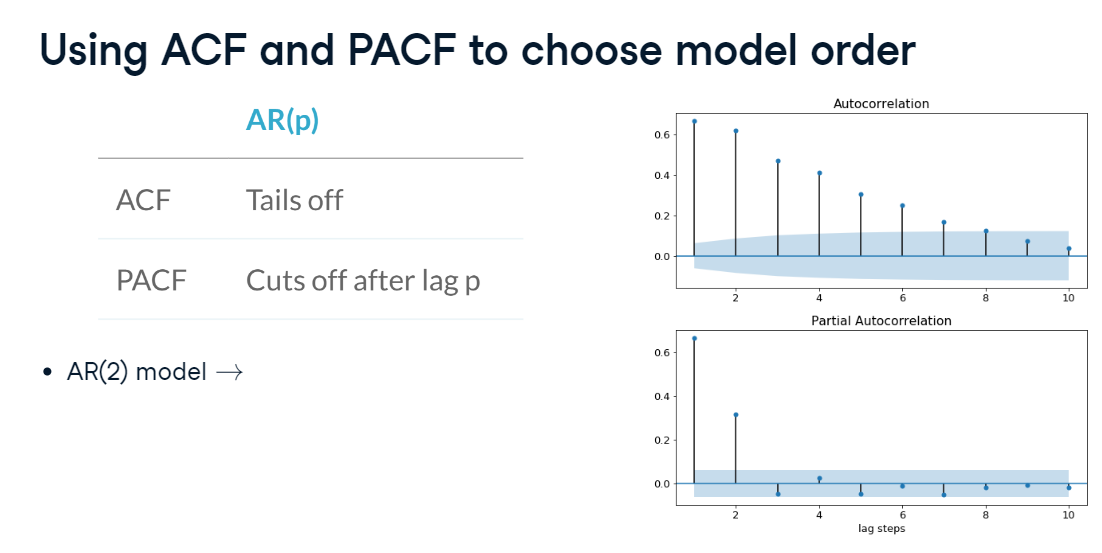

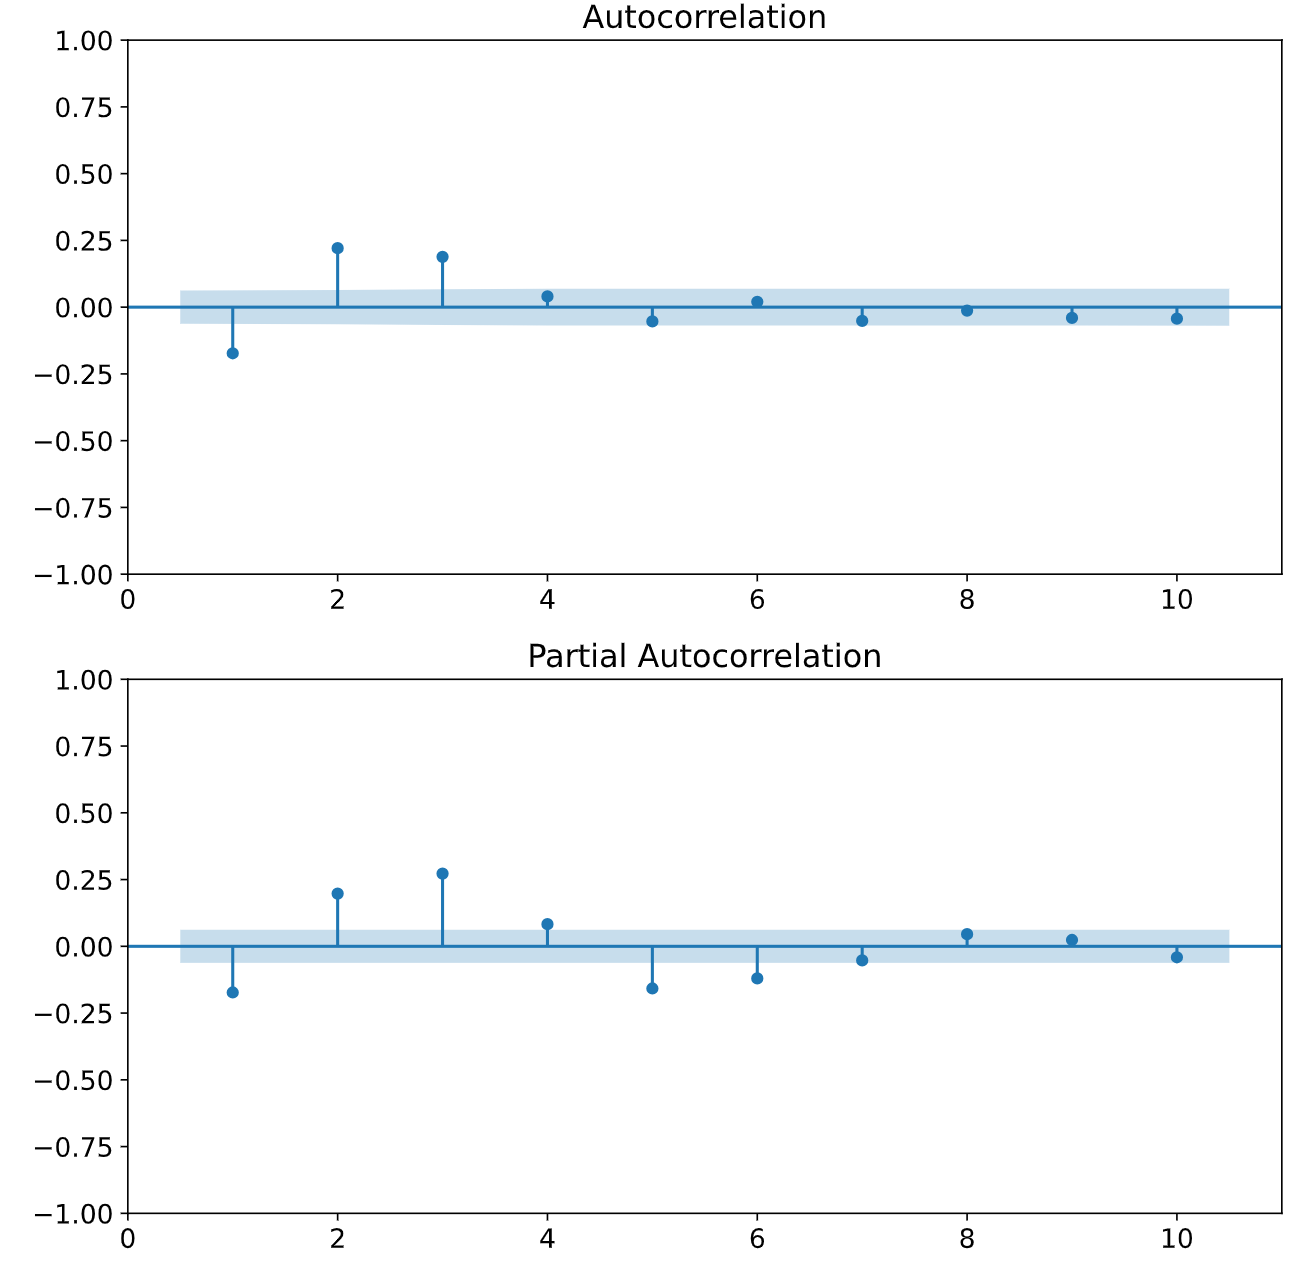

MA(3) 모형

In [6]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(earthquake, order=(1,0,1))
result=model.fit()
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             earthquake   No. Observations:                   99
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -316.228
Date:                Thu, 17 Aug 2023   AIC                            640.456
Time:                        02:42:17   BIC                            650.837
Sample:                    01-01-1900   HQIC                           644.656
                         - 01-01-1998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6684      2.137      9.202      0.000      15.479      23.858
ar.L1          0.8306      0.084      9.881      0.000       0.666       0.995
ma.L1         -0.4369      0.140     -3.119      0.0

In [7]:
print("AIC:", result.aic)
print("BIC:", result.bic)

AIC: 640.4562835911977
BIC: 650.836762991736


AIC
더 나은 예측 -> 낮은 AIC값

매개변수가 높으면 불리 / 데이터에 비해 차수를 높게 설정하면 높은 AIC값

BIC
AIC와 매우 흡사

차이점 : 모델 복잡성에 패널티를 주는 정도

BIC가 AIC보다 추가 모델 주문에 더 많은 패널티를 주기 때문에 BIC가 때때로 더 간단한 모델 제안

좋은 예측 모델을 식별하고자 할 때 -> AIC /
좋은 설명 모델을 식별하고자 할 때 -> BIC

In [8]:
order_aic_bic=[]
for p in range(3) :
  for q in range(3) :
    model=ARIMA(earthquake, order=(p,0,q))
    results=model.fit()
    order_aic_bic.append((p,q,results.aic, results.bic))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

In [9]:
order_earthquake=pd.DataFrame(order_aic_bic, columns=['p','q','aic','bic'])

In [10]:
print(order_earthquake.sort_values('aic'))

   p  q         aic         bic
4  1  1  640.456284  650.836763
5  1  2  642.380867  655.356467
8  2  2  642.468590  658.039309
6  2  0  642.733854  653.114333
3  1  0  643.967677  651.753037
7  2  1  647.440664  660.416264
2  0  2  651.733227  662.113706
1  0  1  654.846859  662.632218
0  0  0  676.544359  681.734599


In [11]:
order_aic_bic=[]
for p in range(5) :
  for q in range(5) :
    try :
      model=ARIMA(earthquake, order=(p,0,q))
      results=model.fit()
      order_aic_bic.append((p,q,results.aic, results.bic))
    except:
      order_aic_bic.append((p,q,None,None))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

In [12]:
order_earthquake=pd.DataFrame(order_aic_bic, columns=['p','q','aic','bic'])

In [13]:
order_earthquake

,p,q,aic,bic
0,0,0,676.544359,681.734599
1,0,1,654.846859,662.632218
2,0,2,651.733227,662.113706
3,0,3,647.930561,660.906160
4,0,4,647.129028,662.699747
5,1,0,643.967677,651.753037
6,1,1,640.456284,650.836763
7,1,2,642.380867,655.356467
8,1,3,643.062669,658.633389
9,1,4,644.774625,662.940464


In [15]:
# Model diagnostics
model=ARIMA(earthquake, order=(1,0,1))
results=model.fit()
residuals=results.resid

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [16]:
residuals

date
1900-01-01   -6.668368
1901-01-01   -2.071530
1902-01-01   -7.810901
1903-01-01   -3.350160
1904-01-01    2.902033
                ...   
1994-01-01   -2.550422
1995-01-01    8.095100
1996-01-01    1.439636
1997-01-01   -0.976147
1998-01-01   -4.370300
Length: 99, dtype: float64

In [19]:
# mean absolute error
import numpy as np
mae=np.mean(np.abs(residuals))

In [26]:
mae

4.56898829488138

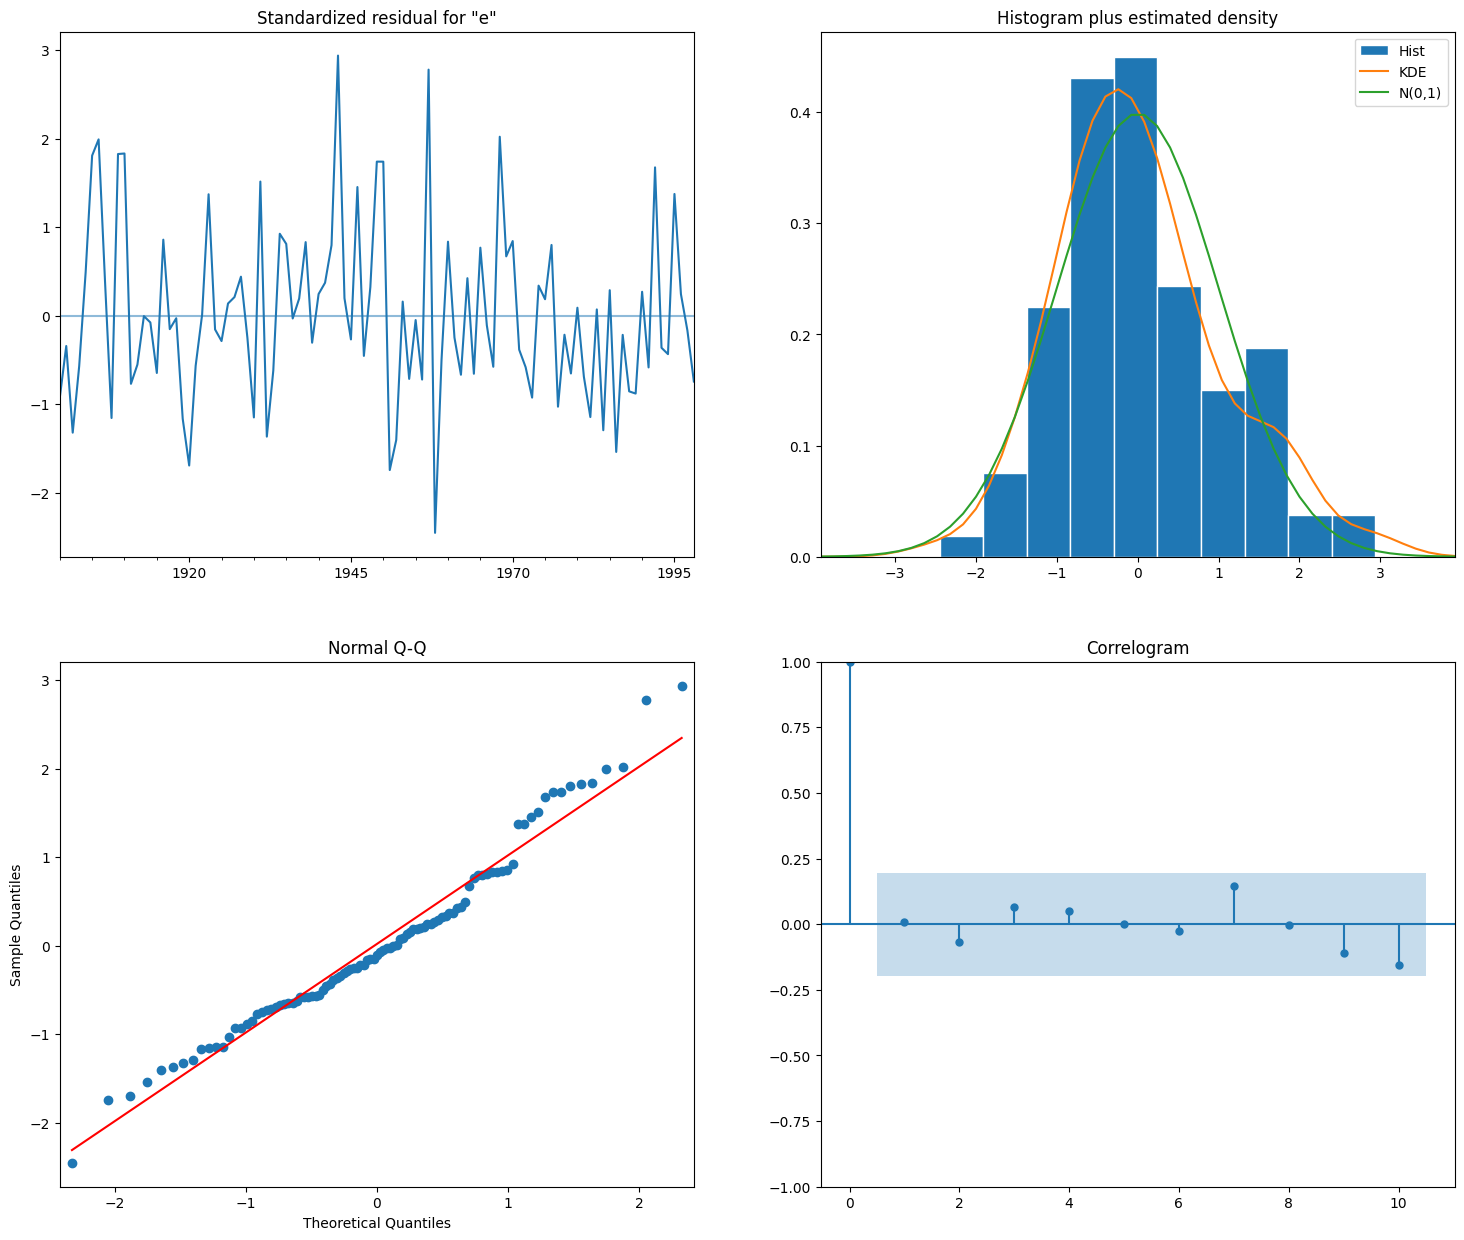

In [24]:
# plot diagnostics
results.plot_diagnostics(figsize=(18,15))
plt.show()

# histogram - 주황색 선 : 평활 버전 / 녹색 선 : 정규분포
# 모델이 좋을 경우 두 라인이 거의 같아야 함

## normal Q-Q -> 잔차 분포가 정규분포를 따르는지

## 잔차의 ACF plot

잔차 plot
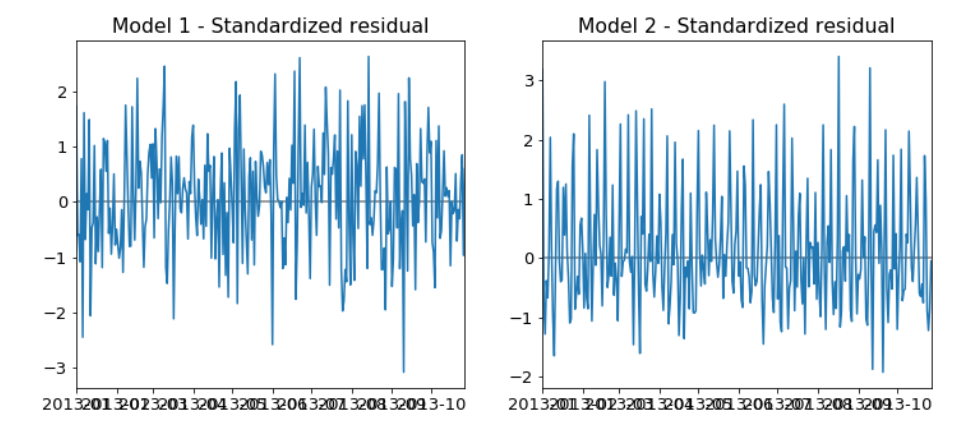

왼쪽 – 패턴 x 오른쪽 – 패턴 O

In [25]:
results.summary()
# prob q : 잔차에 상관 구조가 없다는 귀무가설과 관련된 p값
# prob jb : 잔차가 가우스 정규분포를 따른다는 귀무가설과 관련된 p값
# p값이 0.05보다 작을 경우 귀무 가설 기각
# prob(Q)가 0.05보다 큼 - uncorrleated
# prob(JB)가 0.05보다 큼 - normally distributed

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             earthquake   No. Observations:                   99
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -316.228
Date:                Thu, 17 Aug 2023   AIC                            640.456
Time:                        02:54:48   BIC                            650.837
Sample:                    01-01-1900   HQIC                           644.656
                         - 01-01-1998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6684      2.137      9.202      0.000      15.479      23.858
ar.L1          0.8306      0.084      9.881      0.000       0.666       0.995
ma.L1         -0.4369      0.140     -3.119      0.002      -0.711      -0.162
sigma2        34.6640      4.985      6.953      0.000      24.893      44.435
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.51
Prob(Q):                              0.93   Prob(JB):                         0.06
Heteroskedasticity (H):               0.69   Skew:                             0.56
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

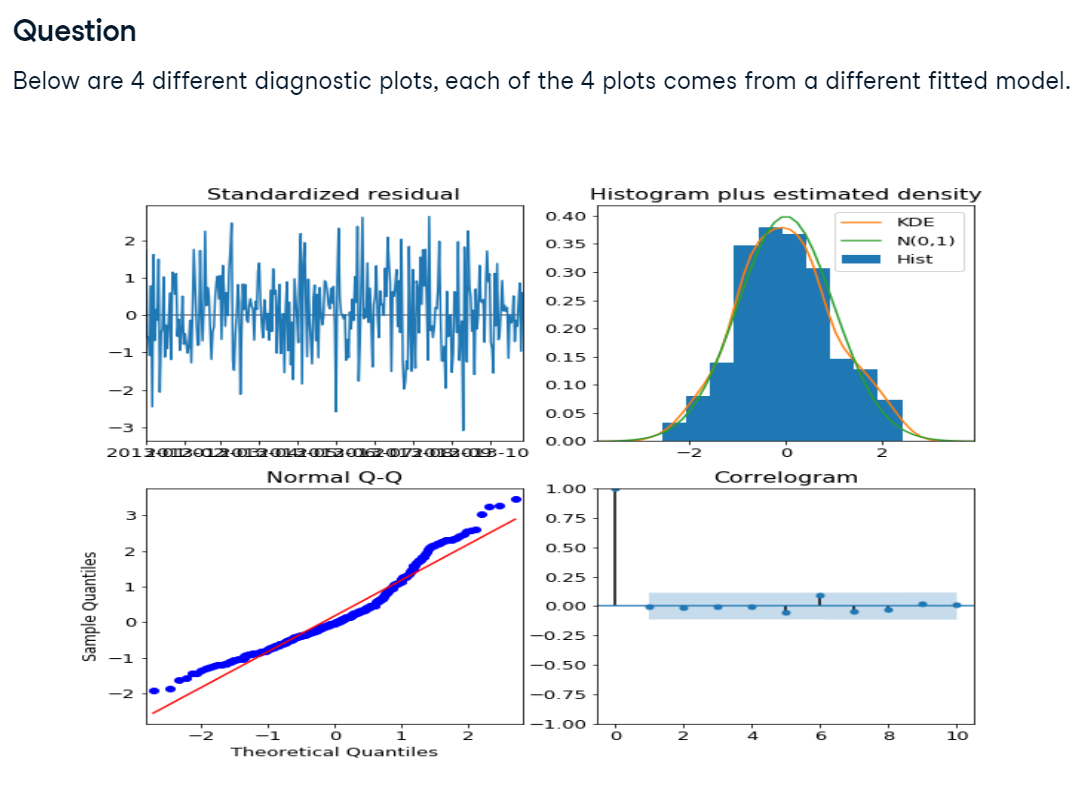

In [ ]:
# box jenkins method
# 원시 데이터에서 생산 준비가 된 모델로 이동하기 위한 체크리스트
# 1. 식별 단계 - ARIMA 모델링에 적합한 데이터 찾기 - 시계열 정상성 확인(차분, 로그 변환)
# 정상성 확인 방법 - 시계열 그래프 확인 또는 adf 확인
# 2, 추정(estimation) - model.fit() 또는 AIC, BIC 등
# 3. model diagnostic - 가장 적합한 모델 품질 평가(테스트 통계 및 진단 플롯 등)
# 4. decision - 잔차가 예상대로가 아니면 이전 단계로 돌아가야 함

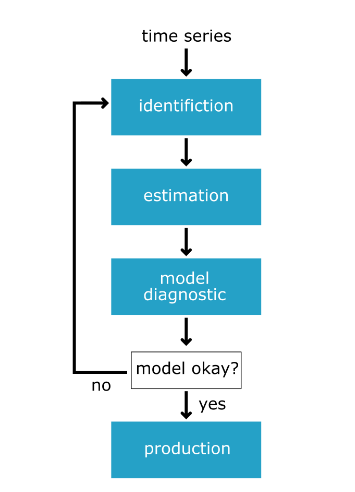